In [1]:
import numpy as np
from gpu_xray_scattering import XS
from gpu_xray_scattering.Molecule import Molecule
import glob
import MDAnalysis as mda
from MDAnalysis.topology.guessers import guess_types

def readPDB(fname, sel='protein', sel2=None, psf=None):
    if psf is not None:
        U = mda.Universe(psf, fname)
    else:
        U = mda.Universe(fname)
    Usel = U.select_atoms(sel)
    try:
        print(Uele[:3])
        Uele = Usel.elements
    except:
        guessed_elements = guess_types(U.atoms.names)
        U.add_TopologyAttr('elements', guessed_elements)
        
    
    if sel2 is not None:
        Usel2 = U.select_atoms(sel2)
        return Usel.positions, Usel.elements, Usel2.positions, Usel2.elements
    else:
        return Usel.positions, Usel.elements


In [2]:
pro_coord1, pro_ele1, pro_coord2, pro_ele2 = readPDB('data/1fin_C.pdb', sel='protein', sel2='resname ATP')
pro_coord, pro_ele = readPDB('data/1fin_C.pdb', sel='all')

In [3]:
scatter = XS.Scatter(use_oa=1)

In [4]:
pro_all = Molecule(coordinates=pro_coord, elements=pro_ele)
pro = Molecule(coordinates=pro_coord1, elements=pro_ele1)

In [5]:
S_calc_all = scatter.scatter(pro_all, timing=True)
S_calc_all = scatter.scatter(pro_all, timing=True)
print(S_calc_all[:10])

Elapsed time = 396.851 ms
Elapsed time = 6.245 ms
[2.52867856e+08 2.52013504e+08 2.49456768e+08 2.45251936e+08
 2.39481552e+08 2.32258032e+08 2.23719680e+08 2.14026336e+08
 2.03355168e+08 1.91894784e+08]


In [6]:
S_calc_pro, S_calc_trial, S_calc_cross = \
    scatter.cross_scatter(pro, prior=np.empty((0, 3)), weight=np.empty(0), trial=pro_coord2, timing=True)

Elapsed time = 20.620 ms


In [7]:
S_calc_pro[:10]

array([2.46989840e+08, 2.46149728e+08, 2.43636128e+08, 2.39502560e+08,
       2.33830816e+08, 2.26731872e+08, 2.18342432e+08, 2.08820496e+08,
       1.98341024e+08, 1.87090400e+08])

In [8]:
S_calc_trial[:10]

array([34563.6875    , 34557.1796875 , 34537.64453125, 34505.125     ,
       34459.64453125, 34401.28125   , 34330.1328125 , 34246.25      ,
       34149.78125   , 34040.8515625 ])

In [9]:
S_calc_cross[:10]

array([5843587.5, 5829180.5, 5786024.5, 5714725. , 5616203.5, 5491733. ,
       5342906. , 5171598. , 4979948. , 4770301.5])

In [11]:
((S_calc_all - S_calc_pro - S_calc_trial - S_calc_cross) / S_calc_all)[:10]

array([-5.34617180e-07,  1.52056584e-07,  3.12100046e-07,  5.94796528e-07,
        3.04221633e-07,  1.10733522e-07,  5.30448975e-08, -1.98573693e-08,
        2.27280922e-07,  2.17037882e-07])

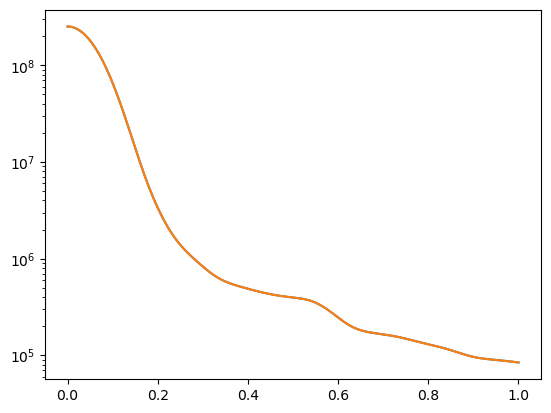

In [12]:
import matplotlib.pyplot as plt
plt.plot(scatter.q, S_calc_all)
plt.yscale('log')
# plt.plot(scatter.q, S_calc_pro)
# plt.plot(scatter.q, S_calc_trial)
# plt.plot(scatter.q, S_calc_cross)
plt.plot(scatter.q, S_calc_pro + S_calc_trial + S_calc_cross)

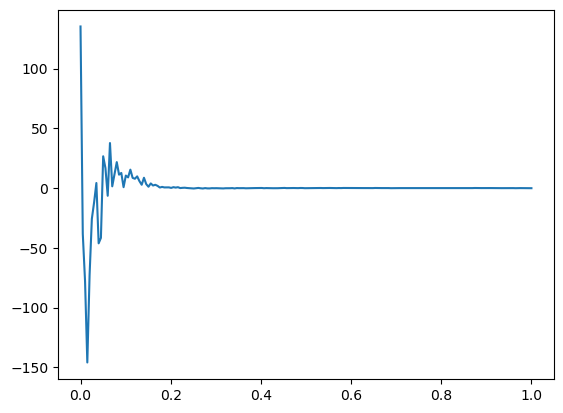

In [13]:
import matplotlib.pyplot as plt
plt.plot(scatter.q, S_calc_pro + S_calc_trial + S_calc_cross - S_calc_all)